### Smith, Travis James

In [5]:
import tensorflow as tf
from tensorflow import keras

tf.keras.__version__

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices("GPU")))

Num GPUs Available:  0


In [6]:
from tensorflow import keras
from keras import layers
from keras import models
from keras import optimizers

Using TensorFlow backend.


In [7]:
import matplotlib.pyplot as plt

# Util to plot model's accuracy and loss over epochs
def plot_history(history):
    acc = history.history["acc"]
    val_acc = history.history["val_acc"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(len(acc))

    plt.plot(epochs, acc, "bo", label="Training acc")
    plt.plot(epochs, val_acc, "b", label="Validation acc")
    plt.title("Training and validation accuracy")
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, "bo", label="Training loss")
    plt.plot(epochs, val_loss, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.legend()

    plt.show()
    
# Util to compare val_acc across models
def compare_histories(history1, history2, history3):
    val1 = history1.history["val_acc"]
    val2 = history2.history["val_acc"]
    val3 = history3.history["val_acc"]
    
    epochs = range(len(val1))

    plt.plot(epochs, val1, "b", label="Model 1", color="green")
    plt.plot(epochs, val2, "b", label="Model 2", color="red")
    plt.plot(epochs, val3, "b", label="Model 3")
    plt.title("Comparing Model Validation Accuracies")
    plt.legend()
    
    plt.show()

## Preliminary: Building the Dataset

In [8]:
import os, shutil

In [9]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = "dogs-vs-cats\\train"


def safely_mkdir(path):
    if not os.path.exists(path):
        os.makedirs(path)


# The directory where we will
# store our smaller dataset
base_dir = "data-set"
safely_mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, "train")
safely_mkdir(train_dir)
validation_dir = os.path.join(base_dir, "validation")
safely_mkdir(validation_dir)
test_dir = os.path.join(base_dir, "test")
safely_mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, "cats")
safely_mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, "dogs")
safely_mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, "cats")
safely_mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, "dogs")
safely_mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, "cats")
safely_mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, "dogs")
safely_mkdir(test_dogs_dir)

files_copied = False
if not files_copied:
    # Copy first 1000 cat images to train_cats_dir
    fnames = ["cat.{}.jpg".format(i) for i in range(1000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_cats_dir, fname)
        shutil.copyfile(src, dst)

    # Copy next 500 cat images to validation_cats_dir
    fnames = ["cat.{}.jpg".format(i) for i in range(1000, 1500)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(validation_cats_dir, fname)
        shutil.copyfile(src, dst)

    # Copy next 500 cat images to test_cats_dir
    fnames = ["cat.{}.jpg".format(i) for i in range(1500, 2000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(test_cats_dir, fname)
        shutil.copyfile(src, dst)

    # Copy first 1000 dog images to train_dogs_dir
    fnames = ["dog.{}.jpg".format(i) for i in range(1000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_dogs_dir, fname)
        shutil.copyfile(src, dst)

    # Copy next 500 dog images to validation_dogs_dir
    fnames = ["dog.{}.jpg".format(i) for i in range(1000, 1500)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(validation_dogs_dir, fname)
        shutil.copyfile(src, dst)

    # Copy next 500 dog images to test_dogs_dir
    fnames = ["dog.{}.jpg".format(i) for i in range(1500, 2000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(test_dogs_dir, fname)
        shutil.copyfile(src, dst)

files_copied = True

In [10]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    # This is the target directory
    train_dir,
    # All images will be resized to 150x150
    target_size=(150, 150),
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode="binary",
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=20, class_mode="binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Problem 1

The number of parameters is equal to: (filters in) * (kernel size) * (filters out) + bias. The bias has the same size as the number of outgoing filters.

For the third convolution layer with $73,856$ tunable parameters, the calculation comes out to:
$64 \cdot 9 \cdot 128 + 128$.

# Problem 2

## Run Original Model

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))
model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.RMSprop(lr=1e-4),
    metrics=["acc"],
)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50,
)

Train for 100 steps, validate for 50 steps
Epoch 1/15
100/100 [==============================] - 30s 301ms/step - loss: 0.6890 - acc: 0.5365 - val_loss: 0.6723 - val_acc: 0.5520
Epoch 2/15
 22/100 [=====>........................] - ETA: 22s - loss: 0.6635 - acc: 0.6136

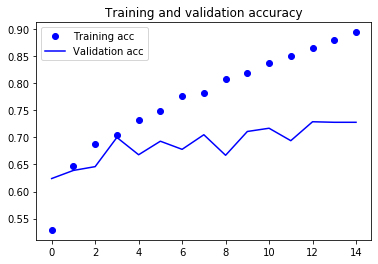

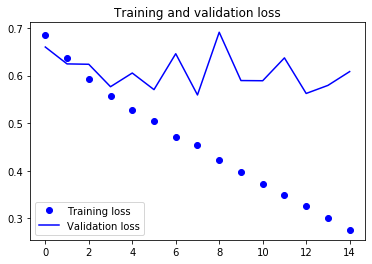

In [16]:
plot_history(history)

## Run Model with Regularization

In [17]:
from keras import regularizers

model_reg = keras.models.Sequential()
model_reg.add(
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3))
)
model_reg.add(keras.layers.MaxPooling2D((2, 2)))
model_reg.add(keras.layers.Conv2D(64, (3, 3), activation="relu"))
model_reg.add(keras.layers.MaxPooling2D((2, 2)))
model_reg.add(keras.layers.Conv2D(128, (3, 3), activation="relu"))
model_reg.add(keras.layers.MaxPooling2D((2, 2)))
model_reg.add(keras.layers.Conv2D(128, (3, 3), activation="relu"))
model_reg.add(keras.layers.MaxPooling2D((2, 2)))
model_reg.add(keras.layers.Flatten())
model_reg.add(
    keras.layers.Dense(
        512, activation="relu", activity_regularizer=regularizers.l2(0.0001)
    )
)
model_reg.add(keras.layers.Dense(1, activation="sigmoid"))
model_reg.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.RMSprop(lr=1e-4),
    metrics=["acc"],
)

history_reg = model_reg.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50,
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/15
100/100 [==============================] - 6s 56ms/step - loss: 0.6860 - acc: 0.5395 - val_loss: 0.6650 - val_acc: 0.6120
Epoch 2/15
100/100 [==============================] - 5s 51ms/step - loss: 0.6506 - acc: 0.6170 - val_loss: 0.6286 - val_acc: 0.6260
Epoch 3/15
100/100 [==============================] - 5s 51ms/step - loss: 0.5980 - acc: 0.6720 - val_loss: 0.6057 - val_acc: 0.6600
Epoch 4/15
100/100 [==============================] - 5s 51ms/step - loss: 0.5557 - acc: 0.7145 - val_loss: 0.6274 - val_acc: 0.6560
Epoch 5/15
100/100 [==============================] - 5s 51ms/step - loss: 0.5230 - acc: 0.7425 - val_loss: 0.5947 - val_acc: 0.6780
Epoch 6/15
100/100 [==============================] - 5s 53ms/step - loss: 0.4913 - acc: 0.7665 - val_loss: 0.6480 - val_acc: 0.6710
Epoch 7/15
100/100 [==============================] - 5s 52ms/step - loss: 0.4628 - acc: 0.7850 - val_loss: 0

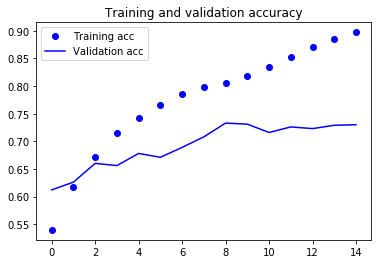

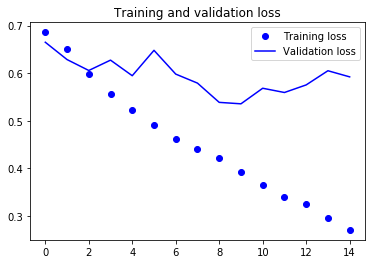

In [18]:
plot_history(history_reg)

There's a very modest improvement in validation accuracy with the L2 regularization, from $.7160$ to $.7270$.

# Problem 3

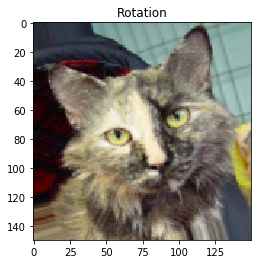

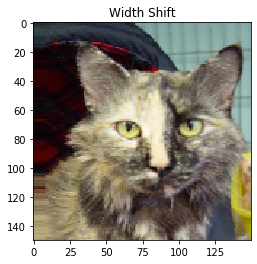

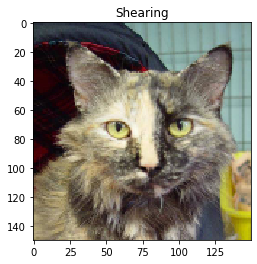

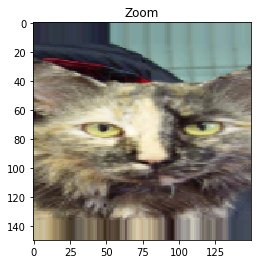

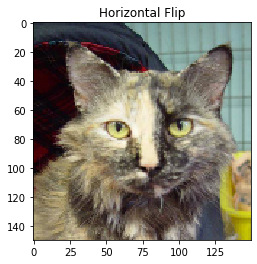

In [19]:
from keras.preprocessing import image

# Load and prep the image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[2]
img = keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
x = keras.preprocessing.image.img_to_array(img)
x = x.reshape((1,) + x.shape)

# Using rotation_range
gen = ImageDataGenerator(rotation_range=40,)
imgs = gen.flow(x, batch_size=1)
imgplot = plt.imshow(image.array_to_img(imgs[0][0]))
plt.title("Rotation")
plt.show()

# Using width_shift
gen = ImageDataGenerator(width_shift_range=0.4,)
imgs = gen.flow(x, batch_size=1)
imgplot = plt.imshow(image.array_to_img(imgs[0][0]))
plt.title("Width Shift")
plt.show()

# Using shear_range
gen = ImageDataGenerator(shear_range=0.2,)
imgs = gen.flow(x, batch_size=1)
imgplot = plt.imshow(image.array_to_img(imgs[0][0]))
plt.title("Shearing")
plt.show()

# Using zoom_range
gen = ImageDataGenerator(zoom_range=0.8,)
imgs = gen.flow(x, batch_size=1)
imgplot = plt.imshow(image.array_to_img(imgs[0][0]))
plt.title("Zoom")
plt.show()

# Using horizontal_flip
gen = ImageDataGenerator(horizontal_flip=True,)
imgs = gen.flow(x, batch_size=1)
imgplot = plt.imshow(image.array_to_img(imgs[0][0]))
plt.title("Horizontal Flip")
plt.show()

I'm not really sure what "shearing" does (I know what the term means generally but it doesn't seem to do much here). Other than that, everything else does what it's expected to.

# Problem 4

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=16, class_mode="binary",
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=16, class_mode="binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
history_da = model_reg.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50,
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/15
100/100 [==============================] - 9s 86ms/step - loss: 0.6124 - acc: 0.6681 - val_loss: 0.5193 - val_acc: 0.7337
Epoch 2/15
100/100 [==============================] - 9s 86ms/step - loss: 0.5761 - acc: 0.6969 - val_loss: 0.6067 - val_acc: 0.6513
Epoch 3/15
100/100 [==============================] - 9s 86ms/step - loss: 0.5748 - acc: 0.7050 - val_loss: 0.5246 - val_acc: 0.7325
Epoch 4/15
100/100 [==============================] - 9s 86ms/step - loss: 0.5463 - acc: 0.7287 - val_loss: 0.4990 - val_acc: 0.7437
Epoch 5/15
100/100 [==============================] - 9s 86ms/step - loss: 0.5719 - acc: 0.6919 - val_loss: 0.6067 - val_acc: 0.6900
Epoch 6/15
100/100 [==============================] - 9s 86ms/step - loss: 0.5413 - acc: 0.7262 - val_loss: 0.5170 - val_acc: 0.7337
Epoch 7/15
100/100 [==============================] - 9s 86ms/step - loss: 0.5442 - acc: 0.7125 - val_loss: 0

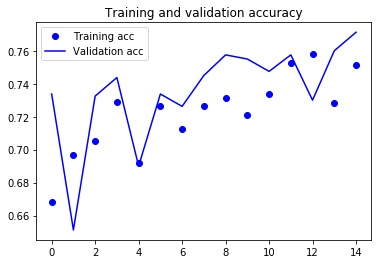

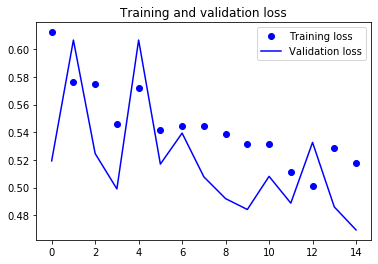

In [22]:
plot_history(history_da)

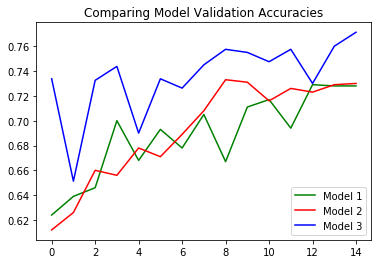

In [23]:
compare_histories(history, history_reg, history_da)

Our accuracy went up again! To about $.7500$, so that's a decent improvement.

# Problem 5

In [24]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

model_pt = keras.models.Sequential()
model_pt.add(conv_base)
model_pt.add(keras.layers.Flatten())
model_pt.add(keras.layers.Dense(256, activation="relu"))
model_pt.add(keras.layers.Dense(1, activation="sigmoid"))

In [25]:
conv_base.trainable = True

for layer in conv_base.layers:
    layer.trainable = False

# Print the number of trainable params with each layer unblocked
for layer in conv_base.layers[-4:]:
    layer.trainable = True
    print(conv_base.summary())
    layer.trainable = False
    
# With all fifth block layers unfrozen
for layer in conv_base.layers[-4:]:
    layer.trainable = True
    
print(conv_base.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Unsurprisingly, freezing each layer individually opens up $2,359,808$ trainable parameters. This is what we'd expect since those layers have that number of parameters.

When we open up all three conv layers for training, we have $7,079,424$ trainable parameters.

In [26]:
for layer in conv_base.layers:
    layer.trainable = False
    
# Opening up just block5_conv3 for training
for layer in conv_base.layers:
    if layer.name == "block5_conv3":
        layer.trainable = True
        
model_pt.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 4,457,473
Non-trainable params: 12,354,880
_________________________________________________________________


With that one layer opened up, we have $4,457,473$ trainable params across the whole model (rather than just the convolution base).

In [27]:
model_pt.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history_pt = model_pt.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50,
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/15
100/100 [==============================] - 9s 90ms/step - loss: 0.6135 - acc: 0.6725 - val_loss: 0.4812 - val_acc: 0.8012
Epoch 2/15
100/100 [==============================] - 9s 87ms/step - loss: 0.4997 - acc: 0.7744 - val_loss: 0.3731 - val_acc: 0.8612
Epoch 3/15
100/100 [==============================] - 9s 86ms/step - loss: 0.4301 - acc: 0.8288 - val_loss: 0.3299 - val_acc: 0.8612
Epoch 4/15
100/100 [==============================] - 9s 86ms/step - loss: 0.4021 - acc: 0.8138 - val_loss: 0.2919 - val_acc: 0.8838
Epoch 5/15
100/100 [==============================] - 9s 86ms/step - loss: 0.3843 - acc: 0.8313 - val_loss: 0.2698 - val_acc: 0.8875
Epoch 6/15
100/100 [==============================] - 9s 87ms/step - loss: 0.3494 - acc: 0.8444 - val_loss: 0.2515 - val_acc: 0.8988
Epoch 7/15
100/100 [==============================] - 9s 87ms/step - loss: 0.3397 - acc: 0.8550 - val_loss: 0

I would have tried with more epochs but my personal machine needs a new PSU.

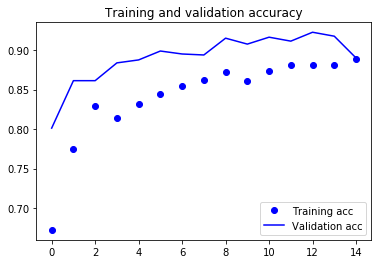

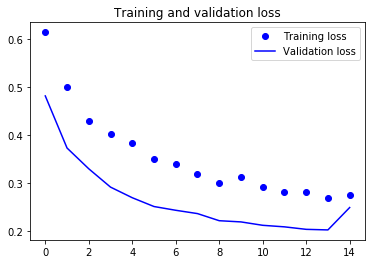

In [28]:
plot_history(history_pt)

Looking at the Chollet notebook, he achieved an accuracy of about $.9240$ after 15 epochs, unfreezing all three block5 layers. We managed about $.9050$ training only the third layer, so we got pretty close with a lot less computational overhead. That's pretty good I think.